![coursera_logo](coursera_banner.png "Coursera")

# Coursera: Course Dataset
by Javier Azarola

---

# Index

#### 1. Introduction
    1.1 Context
    1.2 Process

#### 2. Data preparation
    2.1 Dataset overview
    2.2 Data cleaning
    2.3 Big picture

#### 3. Which are the most popular organizations?
    3.1 Course offering
    3.2 Students enrolled
    3.3 Is "university" a synonym of quality?

#### 4. Outliers
    4.1 Students enrolled
    4.2 Ratings

#### 5. Which are the most popular courses?
    5.1 Best rated
    5.2 Worst rated

#### 6. Preferred level of knowledge
    6.1 Course difficulty
    6.2 Advanced courses

#### 7. Preferred certification
    7.1 Types of certification

#### 8. Conclusion
    8.1 Key insights
    8.2 Next steps

---

# | 1. Introduction

## 1.1 Context

This dataset contains information about the courses offered in the educational platform Coursera. By analyzing the data provided I intend to find trends that might be helpful for Coursera, and for the organizations offering courses in this platform.

## 1.2 Process

This Exploratory Data Analysis (EDA) has been performed in Jupyter Notebooks, using mainly Python's Pandas library, and the newly learned matplotlib and Seaborn libraries for charting. The "Coursera Course Dataset" can be found in Kaggle. Even though there's no information about the time in which this courses were offered or when this data was collected, we can assume it was at the beginning of 2020 because that's when it was uploaded to Kaggle.

---

# | 2. Data preparation

## 2.1 Dataset overview

Before I can start working with the dataset, it's important to **get to know the data** we have at hand. The Coursera dataset has 891 rows (each row displays a different course) and 6 columns.
These columns provide useful information about the course:
- **course_title**: The full name of the course being offered. The titles are mostly in English, though we can see some in other languages (at least 7 more). This won't affect the development of this analysis.
- **course_organization**: The full name of the organization offering the course.
- **course_Certificate_type**: The type of certification that the course offers when finishing with the material provided.
- **course_rating**: The rating given to each course by the students who have completed it.
- **course_difficulty**: The level of knowledge that is offered by the course.
- **course_students_enrolled**: The amount of students enrolled in each course.

Before moving forward it's important to note that the **type of data** of 5 of these columns is *object*, except for course_rating which is *float64*. While 4 of these columns will stay as object (the ones containing the title, organization, certification and difficulty) I'll change the type of the column showing the amount of students enrolled to *int32* in order to do mathematical operations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
coursera_data = pd.read_csv("coursera_data.csv", sep=",", index_col=0)

In [4]:
coursera_data

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [5]:
coursera_data.shape

(891, 6)

In [6]:
coursera_data.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

## 2.2 Data cleaning

Having a clean and tidy dataset is necessary in order to move forward in the analysis and avoid possible errors or misinterpretations. The first step is to make the **structure of the dataset easier to read**, more "friendly". I'll change the names of the columns for new clear, one-word names and I'll set the format of all rows within "certificate" column from all-caps to title format.

After this, I'll modify the way in which the amount of students enrolled is displayed by replacing "k" by thousands (*1000) and "m" by millions (*1000000) when defining the function *convert_to_int*. Then, I'll change the data type of the **"students"** column **from object** type **to int32** type. 
At the end, calling the dataset sorted by enrolled students will give me an idea of the lowest and highest values, with the head and tail of the dataset.

In [8]:
new_column_names = ["title", "organization", "certificate", "rating", "difficulty", "students"]
coursera_data.columns = new_column_names

In [9]:
coursera_data["certificate"] = coursera_data["certificate"].str.title()

In [10]:
coursera_data.head()

,title,organization,certificate,rating,difficulty,students
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320k


In [11]:
def convert_to_int(value):
    if isinstance(value, str) and "k" in value:
        return int(float(value.replace("k", "")) * 1000)
    elif isinstance(value, str) and "m" in value:
        return int(float(value.replace("m", "")) * 1000000)
    elif isinstance(value, (int, float)):
        return int(value)
    return value

coursera_data["students"] = coursera_data["students"].apply(convert_to_int)

In [12]:
coursera_data["students"] = coursera_data["students"].astype(int)

In [13]:
coursera_data.dtypes

title            object
organization     object
certificate      object
rating          float64
difficulty       object
students          int32
dtype: object

In [14]:
coursera_data.sort_values(by="students")

,title,organization,certificate,rating,difficulty,students
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,Course,5.0,Beginner,1500
401,Infectious Disease Modelling,Imperial College London,Specialization,5.0,Intermediate,1600
462,Blockchain Revolution in Financial Services,INSEAD,Specialization,4.6,Beginner,1600
373,Healthcare Law,University of Pennsylvania,Specialization,4.7,Intermediate,1700
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,Course,4.9,Beginner,1700
...,...,...,...,...,...,...
13,Data Science,Johns Hopkins University,Specialization,4.5,Beginner,830000
47,Programming for Everybody (Getting Started wit...,University of Michigan,Course,4.8,Mixed,1300000
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500000
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000


With the following lines of code we can see that there are **no missing values** in this dataset, which is always great news. 

Also, there are no duplicated values as we can confirm with the *duplicated().any.()* functions. But there's more to it: we have 888 unique course titles in a dataset that contains 891 rows. What happens with the remaining 3 titles?
There are 3 course titles that repeat once, but they are different courses. In all three cases, the certification offered is different and in two of them, the organization offering the course is also different (in the third case, the same organization offers two different courses with the same name). This reaffirms the fact that **there are no duplicates** in this dataset.

In [16]:
coursera_data.isnull().any()

title           False
organization    False
certificate     False
rating          False
difficulty      False
students        False
dtype: bool

In [17]:
coursera_data.duplicated().any()

False

In [18]:
coursera_data["title"].nunique()

888

In [19]:
countby_title = coursera_data["title"].value_counts()
top_titles = countby_title[countby_title > 1]
top_titles

title
Developing Your Musicianship    2
Marketing Digital               2
Machine Learning                2
Name: count, dtype: int64

In [20]:
titles_to_find = ["Developing Your Musicianship", "Marketing Digital", "Machine Learning"]
possible_duplicates = coursera_data[coursera_data["title"].isin(titles_to_find)]
possible_duplicates

,title,organization,certificate,rating,difficulty,students
756,Developing Your Musicianship,Berklee College of Music,Course,4.8,Mixed,41000
205,Developing Your Musicianship,Berklee College of Music,Specialization,4.8,Beginner,54000
181,Machine Learning,University of Washington,Specialization,4.6,Intermediate,290000
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200000
241,Marketing Digital,Universidade de São Paulo,Course,4.8,Beginner,81000
325,Marketing Digital,Universidad Austral,Specialization,4.7,Beginner,39000


## 2.3 Big picture

Now that I have prepared my dataset and made the necessary changes, I'm ready to move on to the analysis. Before going deep into it, I'm going to take a look at the big picture:
- As mentioned before, we have **891** different courses in this dataset.
- There are **154** different organizations, which means that - probably, many of them offer several courses in this platform.
- We have **205** different values showing the amount of students enrolled: this doesn't give us much information on its own, but we can see a wide spread.
- The courses offer **3** different types of Certificate: "Course", "Specialization", "Professional Certificate". The amount of courses in each one of these Certifications differ a lot.
- There are **4** different categories regarding the difficulty of the course: Beginner, Intermediate, Mixed and Advanced. Again, the amount of courses in each category is quite far from the others.
- We count **14** different rating values: The vast majority sit between 4.2 and 4.9, we have 2 courses with 5.0 rating and there's nothing under 3.3.

In [22]:
coursera_data["organization"].nunique()

154

In [23]:
coursera_data["students"].nunique()

205

In [24]:
countby_certificate = coursera_data["certificate"].value_counts()
countby_certificate

certificate
Course                      582
Specialization              297
Professional Certificate     12
Name: count, dtype: int64

In [25]:
countby_difficulty = coursera_data["difficulty"].value_counts()
countby_difficulty

difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

In [26]:
countby_rating = coursera_data["rating"].value_counts()
countby_rating

rating
4.8    256
4.7    251
4.6    168
4.5     80
4.9     68
4.4     34
4.3     15
4.2     10
5.0      2
4.0      2
3.9      2
3.3      1
4.1      1
3.7      1
Name: count, dtype: int64

---

# | 3. Which are the most popular organizations?

## 3.1 Course offering

There are 154 organizations offering a wide variety of courses in Coursera.

The **top 20 organizations** amount for half of the courses offered in this dataset (exactly 445 courses), *though I've decided to keep 21 organizations because it would be an authoritary decision to remove University of Alberta, Minnesota or Toronto considering that they all display 11 courses*. On this line of thought, this Top 21 goes over half of the total course offering.

On the other end, we have 49 organization that offer only **1 course** in this educational platform.

The remaining 84 organizations sit between 2 and 10 courses offered. Even though further analysis could be done, it exceeds the scope of this report.

*Does the amount of courses offered define the **popularity** of the organization?* Probably not, but it's likely a sympton. The fact that people choose a course from some organization will encourage them to offer more courses, receiving more students as a consecuence.

In [28]:
countby_organization = coursera_data["organization"].value_counts()
top_organizations = countby_organization[countby_organization > 10]
top_organizations

organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
University of Virginia                        19
Yale University                               17
Stanford University                           16
deeplearning.ai                               16
Universidad Nacional Autónoma de México       14
Berklee College of Music                      14
Rice University                               13
University of Colorado System                 13
University of Toronto                         11
University of Minnesota                       11
Univers

In [29]:
top_organizations.sum()

456

In [30]:
top_organizations.count()

21

In [31]:
bottom_organizations = countby_organization[countby_organization == 1]
bottom_organizations.count()

49

## 3.2 Students enrolled

Another way to define the popularity of these organizations is to look at the amount of students that have taken their courses. We have here the **Top 25 organizations by** the total amount of **students enrolled**. In this table we can also see the total amount of courses offered, the average amount of students enrolling in each organization and a ranking based on the average.

With this ranking I intend to look further than the total students that have taken courses from each organization and evaluate how they do in comparisson with the amount of courses they offer. Given the wide spread of these values between organizations we can't fully rely on the averages, but we can see some organizations highly ranked in both: **8 of the top 10 organizations** by amount of students are very well ranked by average.

With this information, we could conclude that the *University of Michigan* and *Stanford University* are the most popular organizations by these metrics.

In [33]:
students_by_organization = coursera_data.groupby("organization").agg(
    students_enrolled=("students", "sum"),
    num_courses=("title", "count"),
    avg_students=("students", "mean")
).sort_values(by="students_enrolled", ascending=False)
students_by_organization['avg_students'] = students_by_organization['avg_students'].round(0).astype(int)
students_by_organization['avg_students_rank'] = students_by_organization['avg_students'].rank(method='dense', ascending=False).astype(int)
students_by_organization.head(25)

,students_enrolled,num_courses,avg_students,avg_students_rank
organization,,,,
University of Michigan,7437700,41,181407,7
University of Pennsylvania,5501300,59,93242,29
Stanford University,4854000,16,303375,1
"University of California, Irvine",4326000,27,160222,11
Johns Hopkins University,4298900,28,153532,12
Duke University,3967600,28,141700,14
Yale University,3952000,17,232471,2
IBM,2956400,22,134382,16
deeplearning.ai,2863400,16,178962,9


## 3.3 Is "university" a synonym of quality?

All around the world, universities are a big part of the **professional development** of people and the countries as a whole. This gives each University an important place when any of us wants to study or follow a career. It looks like it's not different when looking into Coursera's platform.

There are **641 courses taught by universities**, from a total amount of 891. This amounts for a 71.94% of the total.

***Note for the reviewer***: To do this, I printed my database in STR format using .to_string() and looked at the values, considering that 891 rows is not too much. I spotted every different language in which I found the word "University" (7 languages). In this case this worked well, but it has some weaknesses: it's not automated, there's no hard-proof of what I did, and I might have made a human mistake. 

There are better ways to do this, and I definitely will in future reports: finding different languages and translating them using Python's libraries, or using combining the match() function in order to find strong similarities. At the moment, this escapes the content of what I'm learning and generally, the platform's material.

In [35]:
university_keywords = ["University", "Universidad", "Università", "Universitat", "Universiteit", "Universidade", "Universität"]
mask = coursera_data["organization"].str.contains("|".join(university_keywords), case=False, na=False)
university_count = coursera_data[mask].shape[0]
print(f"There are {university_count} courses taught by Universities, from a total amount of 891 courses.")

There are 641 courses taught by Universities, from a total amount of 891 courses.


In [36]:
pct_uni_courses = (641/891)*100
pct_uni_courses_rounded = round(pct_uni_courses, 2)
print(f"{pct_uni_courses_rounded}% of the courses are taught by Universities.")

71.94% of the courses are taught by Universities.


---

# | 4. Outliers

## 4.1 Students enrolled

I'll start applying the .describe() function on the students' column to get some statistical values. By looking at the standard deviation, we can see that there's a wide variability among these values. Also, if we look at the 75% and maximum values, it's likely that we will find some outliers on the upper bound.

In order to find outliers in this dataset, I've used the **IQR method** (interquartile range). I've defined a function that will do the calculations, then applied the mask and printed the outliers, sorted in ascending order. I found out that there are **78 outliers**, all of them **on the upper bound** of the dataset, while there are no outliers on the lower bound.

To support this, I've done a Boxplot chart that helps to see the outliers easily. The left part of the chart (the box) looks a bit crowded because of how far are the outliers from the rest of the data.

I've also added a histogram to show the data in a different way, and to be able to see the shape of the distribution as well as the outliers.

In [38]:
pd.options.display.float_format = '{:,.2f}'.format
coursera_data["students"].describe()

count         891.00
mean       90,552.08
std       181,936.45
min         1,500.00
25%        17,500.00
50%        42,000.00
75%        99,500.00
max     3,200,000.00
Name: students, dtype: float64

In [39]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

students_outlier_mask = find_outliers_iqr(coursera_data["students"])
students_outlier_values = coursera_data["students"][students_outlier_mask]
students_sorted_outliers = students_outlier_values.sort_values()
print(students_sorted_outliers)

470     230000
225     230000
30      230000
329     240000
831     240000
        ...   
13      830000
47     1300000
3      1500000
2      2500000
6      3200000
Name: students, Length: 78, dtype: int32


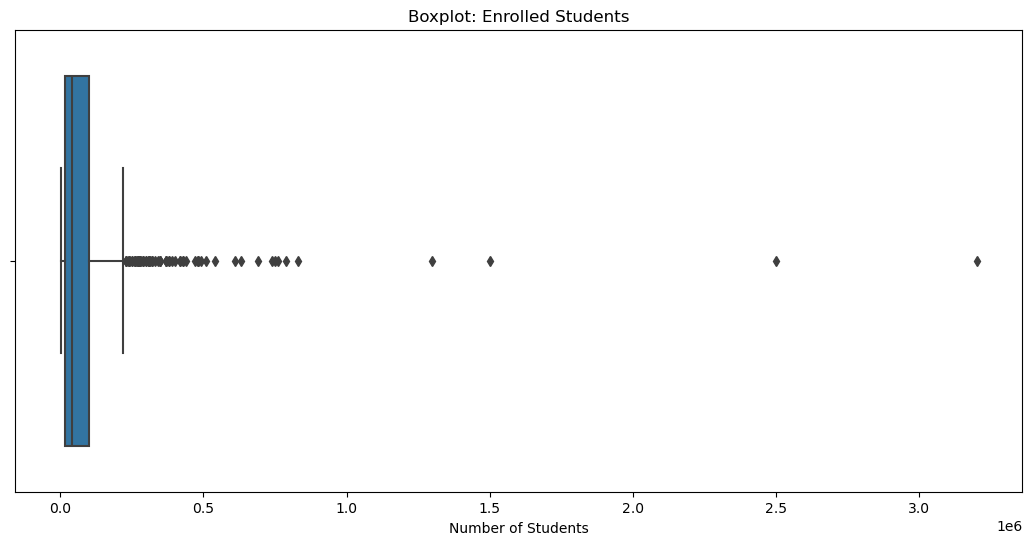

In [40]:
plt.figure(figsize=(13,6))
sns.boxplot(x=coursera_data["students"])
plt.title("Boxplot: Enrolled Students")
plt.xlabel("Number of Students");

C:\Users\javip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


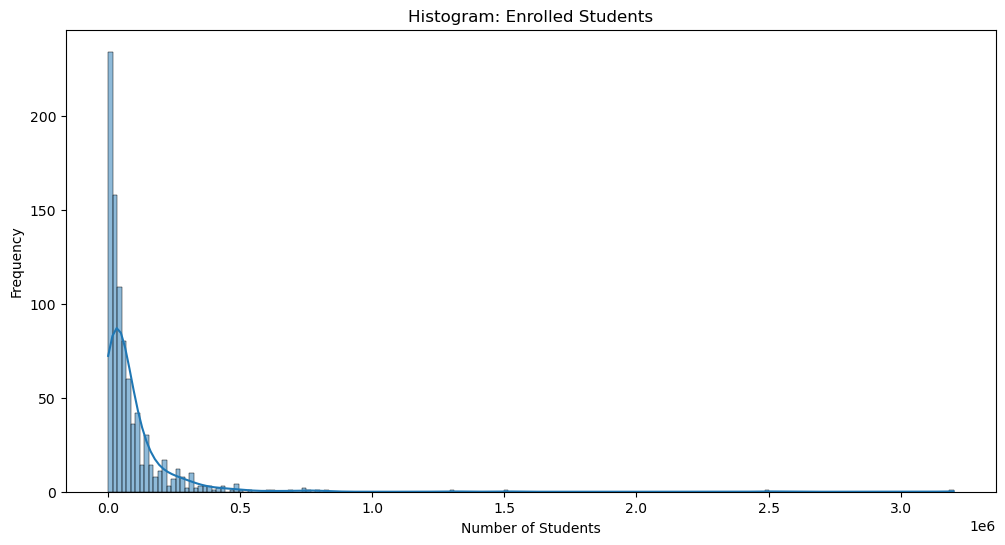

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(coursera_data["students"], kde=True)
plt.title("Histogram: Enrolled Students")
plt.xlabel("Number of Students")
plt.ylabel("Frequency");

## 4.2 Rating

I'll start applying the .describe() function on the ratings' column to get some statistical values. By looking at the mean and the quartile values we can see that most of the data falls in a small range, and that it's skewed to the left side. Even more, the minimum value is quite high and remains on the upper half of the total range, considering that ratings can go from 0 to 5.

I've applied the previously defined function to calculate the IQR on the Ratings column and I've found out that there are **17 outliers**. This time, the outliers are found **on the lower bound** as the most part of the data can be found on the right side of the range.

In this case, I've only created a Boxplot to support this calculations, since we can clearly see the outliers in this chart. 

In [43]:
coursera_data["rating"].describe()

count   891.00
mean      4.68
std       0.16
min       3.30
25%       4.60
50%       4.70
75%       4.80
max       5.00
Name: rating, dtype: float64

In [44]:
rating_outlier_mask = find_outliers_iqr(coursera_data["rating"])
rating_outlier_values = coursera_data["rating"][rating_outlier_mask]
rating_sorted_outliers = rating_outlier_values.sort_values()
print(rating_sorted_outliers)

767   3.30
352   3.70
779   3.90
178   3.90
873   4.00
659   4.00
609   4.10
345   4.20
339   4.20
618   4.20
803   4.20
569   4.20
550   4.20
821   4.20
472   4.20
731   4.20
888   4.20
Name: rating, dtype: float64


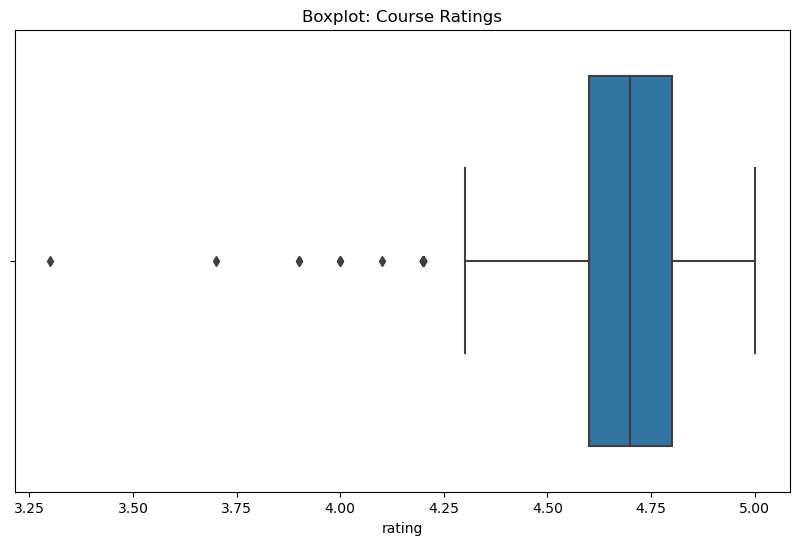

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x=coursera_data["rating"])
plt.title("Boxplot: Course Ratings");

---

# | 5. Which are the most popular courses?

## 5.1 Best rated

Before jumping into the best rated courses, we will look at the **ratings** of all courses offered in this dataset. As we know from the outlier's calculations, we can see in this bar chart that the data is skewed to the left and the big **majority** of values falls **between 4.5 and 4.9**.

By setting 4.9 as the threshold for the **best rated courses** in the platform, we get a result of 70 courses (being equal or higher than 4.9). But when looking for those that are over this threshold, we get only two courses as a result with a rating of 5.0.

We could say that these two courses are the best ones according to ratings (because, they are!), but we have to consider that they have the lowest amount of students enrolled in the whole dataset. On the other hand, we have courses like *"The science of well-being"* and *"Machine Learning"* with a rating of 4.9 and the highest amount of students enrolled in the whole dataset.

In [47]:
rating_df = pd.DataFrame({"rating": countby_rating.index, "count": countby_rating.values})

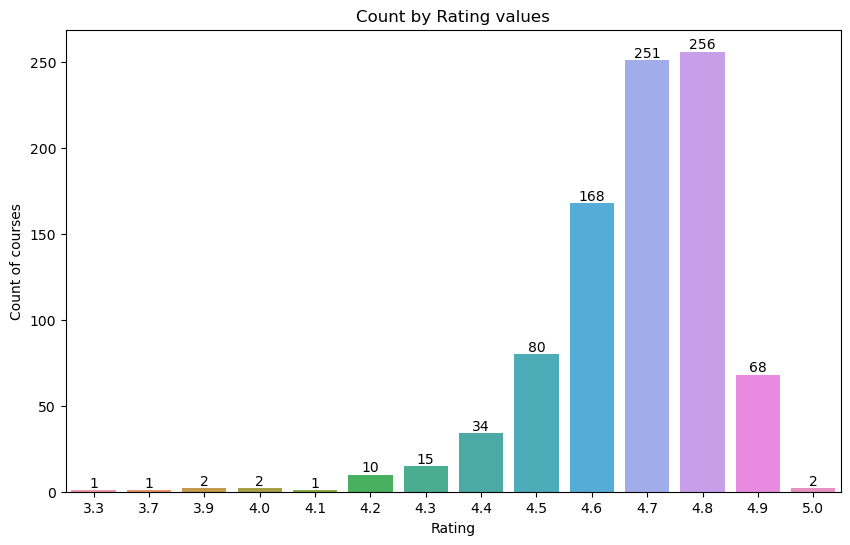

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x="rating", y="count", data=rating_df)
ax = sns.barplot(x="rating", y="count", data=rating_df)
plt.title("Count by Rating values")
plt.ylabel("Count of courses")
plt.xlabel("Rating")
ax.bar_label(ax.containers[0]);

In [49]:
top_courses = coursera_data[coursera_data["rating"] >= 4.90].sort_values(by="students")
top_courses

,title,organization,certificate,rating,difficulty,students
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,Course,5.00,Beginner,1500
401,Infectious Disease Modelling,Imperial College London,Specialization,5.00,Intermediate,1600
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,Course,4.90,Beginner,1700
827,Queering Identities: LGBTQ+ Sexuality and Gend...,University of Colorado System,Course,4.90,Beginner,3000
773,Effective Compliance Programs,University of Pennsylvania,Course,4.90,Mixed,3400
...,...,...,...,...,...,...
113,First Step Korean,Yonsei University,Course,4.90,Beginner,400000
111,Python Data Structures,University of Michigan,Course,4.90,Mixed,420000
62,Neural Networks and Deep Learning,deeplearning.ai,Course,4.90,Intermediate,630000
2,The Science of Well-Being,Yale University,Course,4.90,Mixed,2500000


In [50]:
max_courses = coursera_data[coursera_data["rating"] > 4.90].sort_values(by="students")
max_courses

,title,organization,certificate,rating,difficulty,students
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,Course,5.00,Beginner,1500
401,Infectious Disease Modelling,Imperial College London,Specialization,5.00,Intermediate,1600


## 5.2 Worst rated

In order to find the worst rated courses on this dataset I've set **4.0** as the threshold. The fact that there are only **6 courses** with a rating of 4.0 or less speaks well about Coursera and the course offering on their platform.

Also, we can assume that there are some quality standards within Coursera's policy since it seems unlikely that no organization has ever offered a "bad" or a "low quality" course. In this line of thought, it seems more reasonable that the courses that are badly rated by the students don't have room to stay.

The following 6 courses have the lowest ratings values:

In [52]:
worst_courses = coursera_data[coursera_data["rating"] <= 4.0].sort_values(by="students")
worst_courses

,title,organization,certificate,rating,difficulty,students
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,Course,4.00,Intermediate,13000
178,Machine Learning for Trading,Google Cloud,Specialization,3.90,Intermediate,15000
352,Machine Learning and Reinforcement Learning in...,New York University,Specialization,3.70,Intermediate,29000
873,Mathematics for Machine Learning: PCA,Imperial College London,Course,4.00,Intermediate,33000
779,iOS App Development with Swift,University of Toronto,Specialization,3.90,Intermediate,76000
767,How To Create a Website in a Weekend! (Project...,The State University of New York,Course,3.30,Mixed,140000


---

# | 6. Preferred level of knowledge

## 6.1 Course difficulties

Coursera is offering at the moment 4 different levels of difficulty on their courses: Beginner, Intermediate, Mixed, Advanced. As we see on the following bar chart, **over half** of the courses in this dataset are made for **Beginners**. Intermediate and Mixed difficulties are quite popular too -and very close to each other, leaving Advanced level with a low amount of courses offered.

In [54]:
difficulty_df = pd.DataFrame({"difficulty": countby_difficulty.index, "count": countby_difficulty.values})

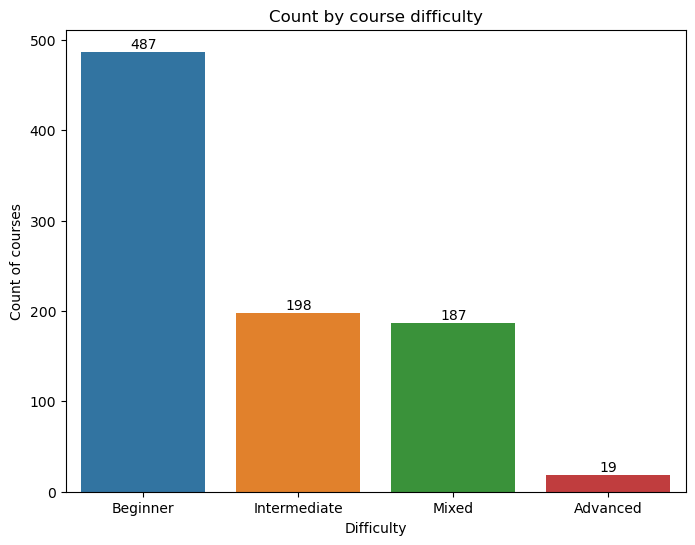

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(x="difficulty", y="count", data=difficulty_df)
ax = sns.barplot(x="difficulty", y="count", data=difficulty_df)
plt.title("Count by course difficulty")
plt.ylabel("Count of courses")
plt.xlabel("Difficulty")
ax.bar_label(ax.containers[0]);

In order to make a more "fair" comparisson, I dug deeper into the **average amount of students** enrolled per level of knowledge. In the following table we have the total amount of students enrolled, the number of courses offered and the average amount of students per difficulty.

There is no big difference between the averages of Beginner, Intermediate and Advance, though it seems like **Mixed courses show an advantage**: this might be perceived by people as a way to get from nothing to a "working/functional level" in one course, combining Beginner and Intermediate.

In [57]:
students_by_difficulty = coursera_data.groupby("difficulty").agg(
    students_enrolled=("students", "sum"),
    num_courses=("title", "count"),
    avg_students=("students", "mean")
).sort_values(by="students_enrolled", ascending=False)
students_by_difficulty['avg_students'] = students_by_difficulty['avg_students'].round(0).astype(int)
students_by_difficulty

,students_enrolled,num_courses,avg_students
difficulty,,,
Beginner,39921800,487,81975
Mixed,24989400,187,133633
Intermediate,14506300,198,73264
Advanced,1264400,19,66547


## 6.2 Advanced courses

There are **19** advanced **courses** in this dataset. If we compare this number with the total amount of courses offered, it is quite low. Also, the amount of students enrolled in these courses fall within the range where the majority of this dataset's values stand, having only one outlier: *"Advanced Data Science with IBM"*.

The fact that neither the offer nor the demand of the Advanced difficulty is too high might imply that people don't come to this platform looking for such a high level of knowledge. And from the organization's perspective, they might keep that level of education for their own staff in a private environment or offer courses through another channel.

The bar chart below displays the amount of Advance courses offered by organization, sorted from top to bottom.

In [59]:
advanced_courses = coursera_data[coursera_data["difficulty"] == "Advanced"]
advanced_courses.sort_values(by="students", ascending=False)

,title,organization,certificate,rating,difficulty,students
157,Advanced Data Science with IBM,IBM,Specialization,4.40,Advanced,320000
103,Advanced Machine Learning,National Research University Higher School of ...,Specialization,4.50,Advanced,190000
214,Medical Neuroscience,Duke University,Course,4.90,Advanced,170000
288,Data Warehousing for Business Intelligence,University of Colorado System,Specialization,4.50,Advanced,140000
683,Probabilistic Graphical Models 1: Representation,Stanford University,Course,4.70,Advanced,68000
648,Strategic Business Analytics,ESSEC Business School,Specialization,4.30,Advanced,60000
271,Learn English: Advanced Grammar and Punctuation,"University of California, Irvine",Specialization,4.80,Advanced,52000
506,Social and Economic Networks: Models and Anal...,Stanford University,Course,4.80,Advanced,42000
154,Self-Driving Cars,University of Toronto,Specialization,4.70,Advanced,39000
729,Introduction to Self-Driving Cars,University of Toronto,Course,4.80,Advanced,39000


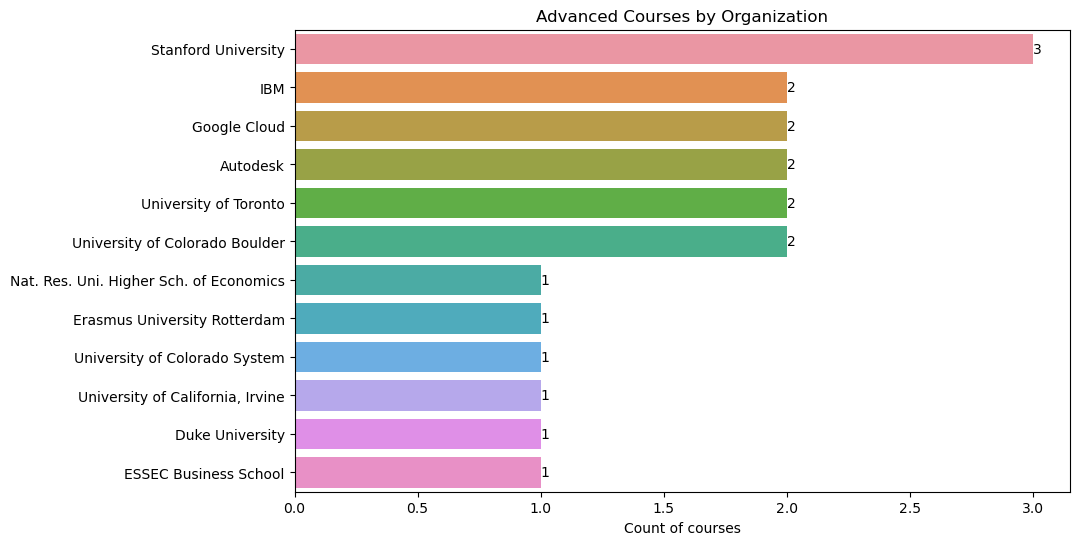

In [60]:
adv_course_byorg = advanced_courses["organization"].value_counts()
adv_course_byorg_df = pd.DataFrame({"organization": adv_course_byorg.index, "count": adv_course_byorg.values})

long_name = "National Research University Higher School of Economics"
short_name = "Nat. Res. Uni. Higher Sch. of Economics"
adv_course_byorg_df["organization"] = adv_course_byorg_df["organization"].replace(long_name, short_name)

plt.figure(figsize=(10, 6))
sns.barplot(y="organization", x="count", data=adv_course_byorg_df)
ax = sns.barplot(y="organization", x="count", data=adv_course_byorg_df)
plt.title("Advanced Courses by Organization")
plt.xlabel("Count of courses")
plt.ylabel("")
ax.bar_label(ax.containers[0]);

---

# | 7. Preferred certification

## 7.1 Types of certification

Coursera offers 3 different types of certifications: Course, Specialization, and Professional Certificate.
On the bar chart below, we can see that the **vast majority** of certifications are **Course**, followed not closely by Specialization, leaving just a few places for Professional Certificates.

Below in the second bar chart, when we look into these few **Professional Certificate** courses (12 courses) we can see a trend regarding the organizations behind them: most of these courses are offered by **Tech giants** (Google, IBM, SAS) and only a couple by universities.

In [62]:
certificate_df = pd.DataFrame({"certificate": countby_certificate.index, "count": countby_certificate.values})

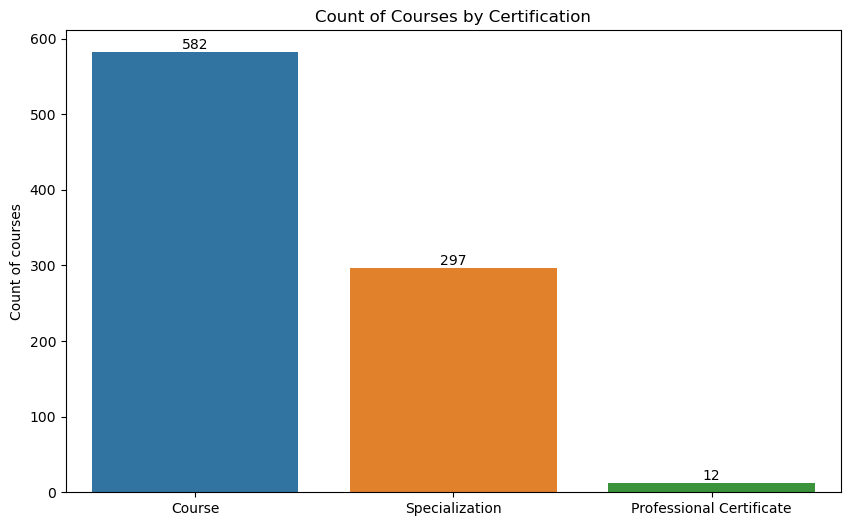

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x="certificate", y="count", data=certificate_df)
ax = sns.barplot(x="certificate", y="count", data=certificate_df)
plt.title("Count of Courses by Certification")
plt.ylabel("Count of courses")
plt.xlabel("")
ax.bar_label(ax.containers[0]);

In [64]:
professional_courses = coursera_data[coursera_data["certificate"] == "Professional Certificate"]
professional_courses.sort_values(by="students", ascending=False)

,title,organization,certificate,rating,difficulty,students
0,IBM Data Science,IBM,Professional Certificate,4.60,Beginner,480000
160,SAS Programmer,SAS,Professional Certificate,4.80,Beginner,370000
4,Google IT Support,Google,Professional Certificate,4.80,Beginner,350000
9,Cloud Engineering with Google Cloud,Google Cloud,Professional Certificate,4.70,Intermediate,310000
12,IBM Applied AI,IBM,Professional Certificate,4.60,Beginner,220000
56,Arizona State University TESOL,Arizona State University,Professional Certificate,4.90,Beginner,150000
34,IBM AI Engineering,IBM,Professional Certificate,4.60,Intermediate,140000
22,Data Engineering with Google Cloud,Google Cloud,Professional Certificate,4.60,Intermediate,120000
25,Google IT Automation with Python,Google,Professional Certificate,4.70,Beginner,93000
153,UCI Project Management,"University of California, Irvine",Professional Certificate,4.60,Beginner,44000


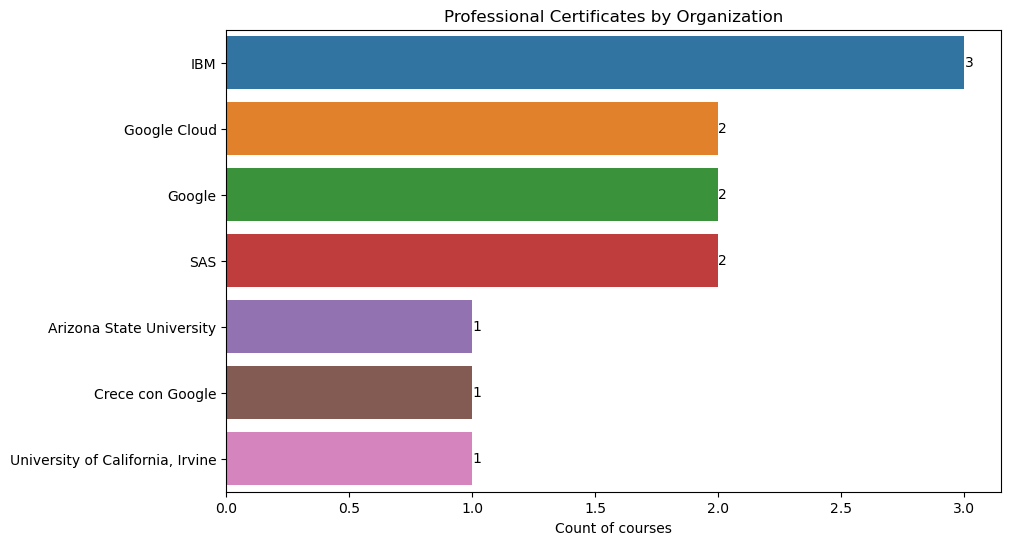

In [65]:
prof_course_byorg = professional_courses["organization"].value_counts()
prof_course_byorg_df = pd.DataFrame({"organization": prof_course_byorg.index, "count": prof_course_byorg.values})

plt.figure(figsize=(10,6))
sns.barplot(y="organization", x="count", data=prof_course_byorg_df)
ax = sns.barplot(y="organization", x="count", data=prof_course_byorg_df)
plt.title("Professional Certificates by Organization")
plt.ylabel("")
plt.xlabel("Count of courses")
ax.bar_label(ax.containers[0]);

In order to compare the different certifications based on the relation with the quantity of courses each of them have, as I did before, I will calculate the **average amount of students** enrolled per course, per certification.

With this, we can see on the table below that courses offering a Professional Certificate are on average much more popular that the other two. While the total amount of students enrolled on Professional Certificate courses are 8.39% of the amount of students enrolled in Specialization courses, and 4.48% of the total students enrolled in Course, the average **is more than double** when comparing it against them.

In [67]:
students_by_certificate = coursera_data.groupby("certificate").agg(
    students_enrolled=("students", "sum"),
    num_courses=("title", "count"),
    avg_students=("students", "mean")
).sort_values(by="students_enrolled", ascending=False)
students_by_certificate['avg_students'] = students_by_certificate['avg_students'].round(0).astype(int)
students_by_certificate

,students_enrolled,num_courses,avg_students
certificate,,,
Course,51131300,582,87854
Specialization,27262200,297,91792
Professional Certificate,2288400,12,190700


In [68]:
print(f"Students enrolled on Professional Certificate {round((2288400 / 27262200)*100,2)}% of Specializations.")
print(f"Students enrolled on Professional Certificate {round((2288400 / 51131300)*100,2)}% of 'Course'.")
print(f"On average, Professional Certificate {round((190700 / 91792)*100,2)}% and {round((190700 / 87854)*100,2)}% higher.")

Students enrolled on Professional Certificate 8.39% of Specializations.
Students enrolled on Professional Certificate 4.48% of 'Course'.
On average, Professional Certificate 207.75% and 217.06% higher.


---

# | 8. Conclusion

## 8.1 Key insights

1. There are courses in 7 languages, which gives some optionality for students around the globe.
2. Only 13% of the organizations own more than half of the courses offered in the platform.
3. The most popular organizations reach many students, and usually have a high average amount of students enrolled per course.
4. The word "University" in the organization's name seems to have a positive effect on the students.
5. Some courses have much more students enrolled than the majority of courses offered.
6. Courses' overall ratings are high, hinting that bad rated courses might be removed from the platform under some kind of Quality Policy.
7. The best rated courses have the least amount of students enrolled, though some of the ones following right behind have the most students enrolled.
8. Beginner courses are the most popular in the platform, though students prefer, on average, courses with a Mixed difficulty.
9. There are just a few Advanced courses, leaving room for growth for Coursera and the organizations teaching courses.
10. The "Course" certification is the most popular one, but students strongly prefer "Professional Certificate" on average.

## 8.2 Next steps

As a part of a team of Data Analysts from Coursera, I would suggest to keep track of the dates in which the courses were offered or the span of time that they have been up online (e.g. Start_date: xx/xx/xxxx or days_online: xxx days). This information is key to understand the relationship between the amount of students enrolled and the rating, and how popular (or not) is a Certification or a Difficulty -maybe Advanced courses are new, and they are killing it!. For how long have we offered Professional Certifications?

For Coursera as a platform, I would suggest to increase the amount of languages in which people can study: this could be done by offering more courses in other languages or by including translation tools within the course. At the moment, Coursera could leverage Artificial Intelligence to boost this aspect.
Also, I believe that increasing the offer of Advanced courses and Professional Certifications will impact possitively on the amount of students actively interacting with the website, and the amound of subscriptions. 

---